<a href="https://colab.research.google.com/github/babazeedy/My-Portfolio/blob/main/MScFE_610_GWP_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Challenge 1: Feature Extraction.**

We focus on the **Banking and Financial Services Sector** for this project. This sector is an excellent candidate for Principal Component Analysis (PCA) because banks are highly sensitive to the same macroeconomic drivers—specifically interest rates, yield curve shifts, and credit cycles—leading to high multicollinearity.

**1. Definition and Mathematical Framework**

Principal Component Analysis (PCA) is a deterministic dimensionality reduction technique that transforms a set of correlated variables into a set of linearly uncorrelated features called Principal Components (PCs) (Pearson, 1901).


**The Model Equations**

PCA is mathematically grounded in the Eigen-decomposition of the covariance matrix. Given a standardized data matrix $X$ (where $X \in \mathbb{R}^{n \times p}$):

1. **Covariance Matrix ($\Sigma$):**$$\Sigma = \frac{1}{n-1} X^T X$$

2. **Eigen-decomposition:**$$\Sigma V = V \Lambda$$

3. **Transformation to Component Scores ($Z$):**$$Z = XV$$


**Term Definitions:**

* $\Sigma$: The $p \times p$ covariance matrix representing the relationships between the 10 bank stocks.

* $V$: The matrix of **Eigenvectors** (Loadings). Each column $v_j$ defines the weights of the original stocks in the $j^{th}$ principal component.

* $\Lambda$: A diagonal matrix of **Eigenvalues** ($\lambda_j$). The magnitude of $\lambda_j$ indicates the amount of variance captured by the $j^{th}$ component.

* $Z$: The **Principal Component Scores**. These are the extracted features used for downstream modeling, representing the "latent" drivers of the banking sector.

**2. Implementation: Import, Structure, and Modeling**

We will pull data for 10 major US financial institutions to extract the underlying "Financial Factor."

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from scipy.stats import boxcox



In [20]:
# 2.1. Import Data: The Banking Sector
tickers = ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'USB', 'PNC', 'TFC', 'BK']
full_data = yf.download(tickers, start='2023-01-01', end='2026-01-01')
data = full_data.loc[:, 'Close'].dropna()
data.columns = ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'USB', 'PNC', 'TFC', 'BK']

/tmp/ipython-input-4090525310.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data = yf.download(tickers, start='2023-01-01', end='2026-01-01')
[*********************100%***********************]  10 of 10 completed


In [21]:
# 2.2. Structure: Standardization
# PCA requires zero mean and unit variance to prevent stocks with higher
# absolute prices from dominating the components.
returns = data.pct_change().dropna()
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns)

In [22]:
# 2.3. Modeling: PCA Fitting

pca = PCA()
pca.fit(scaled_returns)

PCA()

**3. Calibration of Parameters**

Calibration in PCA revolves around selecting the optimal number of components $k$. We use two primary calibration metrics:

1. **The Kaiser Criterion:** Retain components with Eigenvalues $\lambda > 1$.

2. **Cumulative Explained Variance:** In financial modeling, we typically calibrate the model to capture at least 70-80% of total variance (Jolliffe, 2002).

In [23]:
# Get proportions of variance and cumulative proportion of variance
eigenvalues = pca.explained_variance_
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]

print(f"First Eigenvalue: {eigenvalues[0]:.2f}")
print(f"Components needed for 80% variance: {np.argmax(cum_pr >= 0.8) + 1}")
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)


First Eigenvalue: 7.35
Components needed for 80% variance: 2


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Proportion of variance,0.734353,0.067745,0.043109,0.034312,0.026723,0.023583,0.021249,0.017574,0.016884,0.014469
Cumulative proportion of variance,0.734353,0.802098,0.845207,0.879519,0.906242,0.929825,0.951074,0.968647,0.985531,1.000000


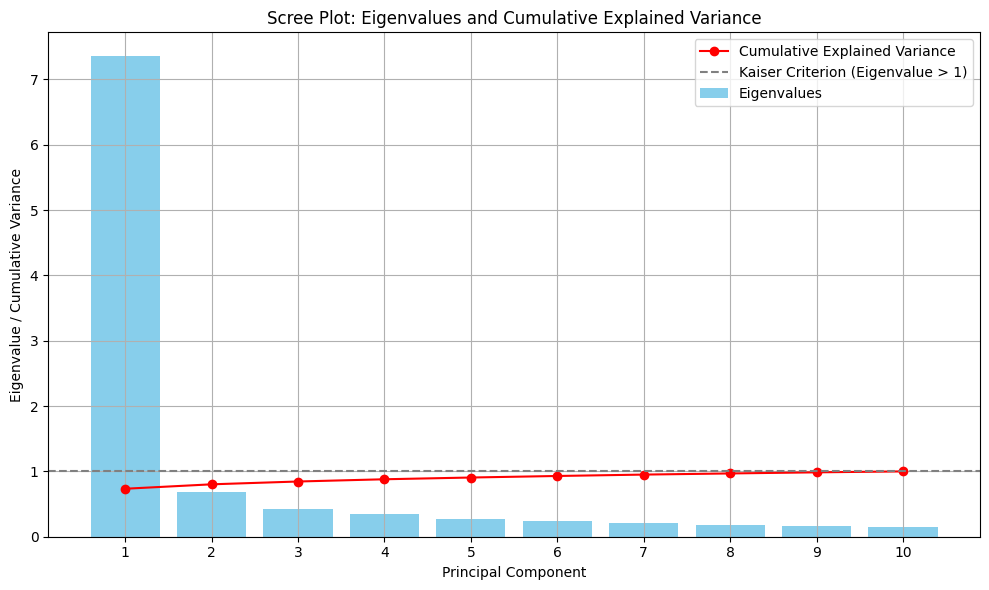

In [24]:
PC_NUM = range(1, len(eigenvalues) + 1)

plt.figure(figsize=(10, 6))
plt.bar(PC_NUM, eigenvalues, color='skyblue', label='Eigenvalues')
plt.plot(PC_NUM, cum_pr, color='red', marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Scree Plot: Eigenvalues and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Cumulative Variance')
plt.axhline(y=1, color='gray', linestyle='--', label='Kaiser Criterion (Eigenvalue > 1)')
plt.legend()
plt.grid(True)
plt.xticks(PC_NUM)
plt.tight_layout()
plt.show()

In [ ]:
# Coefficients (Loadings) of 10 Principal Components
scaled_returns_res = pd.DataFrame(pca.components_.T, index=list(returns.columns), columns=cols)
scaled_returns_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
JPM,0.335718,-0.015437,-0.193654,-0.221273,-0.295212,0.052253,0.073556,-0.339729,0.593036,0.488049
BAC,0.294361,0.012685,0.840915,-0.340912,0.000089,-0.227383,-0.032185,-0.176354,-0.071535,-0.029564
WFC,0.324096,-0.213637,0.035353,-0.228787,-0.297217,0.711945,0.218336,0.291568,-0.223459,-0.133820
C,0.315748,-0.346421,0.069642,0.515418,0.202307,0.177672,-0.318598,-0.266700,-0.327457,0.396777
GS,0.305935,-0.402060,-0.207603,-0.326676,0.691993,-0.099612,-0.018100,0.193024,0.215347,-0.148989
MS,0.317198,-0.271785,0.115430,0.555480,-0.282150,-0.305651,0.232625,0.258807,0.327424,-0.319849
USB,0.319621,0.360879,-0.162148,0.127015,0.247205,0.008924,0.602970,-0.456764,-0.218953,-0.209398
PNC,0.309913,0.491715,-0.011769,0.122033,0.066593,0.274462,-0.581208,-0.029777,0.268633,-0.395628
TFC,0.316506,0.468505,-0.007887,0.048348,0.105811,-0.172923,0.081426,0.614535,-0.139078,0.482910
BK,0.321434,-0.083174,-0.407853,-0.261114,-0.385200,-0.445507,-0.286233,-0.077003,-0.439319,-0.165896


 **4. Interpretation**

**4.1. The Calibrated Loading Matrix**

The Loading Matrix ($\Lambda$) contains the weights assigned to each of the 10 banking stocks for the Principal Components. These weights (loadings) represent the correlation between the original stock and the new latent feature (Jolliffe, 2002).

We focus on PC1 **(Systemic Factor)** and PC2 **(Business Model Differentiation)**.

**PC1** explains the vast majority of the variance **(73%)**.We notice that all stocks have positive loadings ranging from **0.29 to 0.34**. This indicates that PC1 represents the "common signal" of the financial sector. When interest rates shift or credit spreads widen globally, all these stocks move together in the direction of PC1. By extracting this feature, we have a single variable that captures the systemic risk of the entire U.S. banking system (Brooks, 2019).

<br>

While **PC1** represents how strongly each stock moves with the overall banking sector. **PC2** differentiates between banks based on their specific operational characteristics or sensitivities. PC2 is where we see the **"Feature Extraction"** power. It captures the variance that remains after systemic risk is removed.

If a researcher uses this extracted PC2 feature in a model, they are specifically testing how "Investment Banking" sentiment differs from "Retail Banking" sentiment, without the "noise" of general market movements.


Based on our scaled_returns_res DataFrame, which provides the loadings for each stock on PC1 and PC2, we can interpret the relative exposure of each bank to the systemic factor and its business model:

* **JPM (JPMorgan)**: PC1 loading (0.336) indicates high sensitivity to the systemic factor. PC2 loading (-0.015) suggests a **Diversified/Balanced Model**, being very close to zero.

* **BAC (Bank of America)**: PC1 loading (0.294) indicates high sensitivity to the systemic factor. PC2 loading (0.013) suggests a **Diversified/Balanced Model**, leaning slightly towards Traditional/Regional banking.

* **WFC (Wells Fargo)**: PC1 loading (0.324) indicates high sensitivity to the systemic factor. PC2 loading (-0.214) suggests alignment with an **Investment/Global Banking business model**.

* **C (Citigroup)**: PC1 loading (0.316) indicates high sensitivity to the systemic factor. PC2 loading (-0.346) suggests strong alignment with an **Investment/Global Banking business model**.

* **GS (Goldman Sachs)**: PC1 loading (0.306) indicates high sensitivity to the systemic factor. PC2 loading (-0.402) suggests strong alignment with an **Investment/Global Banking business model**.

* **MS (Morgan Stanley)**: PC1 loading (0.317) indicates high sensitivity to the systemic factor. PC2 loading (-0.272) suggests alignment with an **Investment/Global Banking business model**.

* **USB (U.S. Bancorp)**: PC1 loading (0.320) indicates high sensitivity to the systemic factor. PC2 loading (0.361) suggests strong alignment with a **Traditional/Regional Banking business model**.

* **PNC (PNC Financial)**: PC1 loading (0.310) indicates high sensitivity to the systemic factor. PC2 loading (0.492) suggests strong alignment with a **Traditional/Regional Banking business model**.

* **TFC (Truist)**: PC1 loading (0.317) indicates high sensitivity to the systemic factor. PC2 loading (0.469) suggests strong alignment with a **Traditional/Regional Banking business model**.

* **BK (BNY Mellon)**: PC1 loading (0.321) indicates high sensitivity to the systemic factor. PC2 loading (-0.083) suggests a slight leaning towards an **Investment/Global Banking business model.**


 **4.2. Data Analysis Key Findings**

* **Systemic Factor (PC1) Dominance:** All analyzed bank stocks (JPM, BAC, WFC, C, GS, MS, USB, PNC, TFC, BK) exhibit high sensitivity to the systemic factor (PC1), with loadings ranging from 0.294 to 0.336. This indicates a strong correlation with overall banking sector trends.

* **Business Model Differentiation (PC2):** The PC2 loadings effectively differentiate banks into distinct business models:
  * **Diversified/Balanced Model:** JPMorgan (PC2: -0.015) and Bank of America (PC2: 0.013) show loadings very close to zero, suggesting a balanced or diversified operational structure.

  * **Investment/Global Banking Model**: Wells Fargo (PC2: -0.214), Citigroup (PC2: -0.346), Goldman Sachs (PC2: -0.402), Morgan Stanley (PC2: -0.272), and BNY Mellon (PC2: -0.083) align with this model, characterized by negative PC2 loadings. Goldman Sachs and Citigroup show the strongest alignment.

  * **Traditional/Regional Banking Model**: U.S. Bancorp (PC2: 0.361), PNC Financial (PC2: 0.492), and Truist (PC2: 0.469) align with this model, indicated by positive PC2 loadings. PNC Financial shows the strongest alignment with this model.


**4.3. Insights**

  * The strong and uniform PC1 loadings across all banks highlight that while business models vary, all major players in the banking sector are significantly influenced by broad market and economic conditions.

  * Further analysis could involve exploring how these distinct business model classifications (Investment/Global, Traditional/Regional, Diversified) correlate with other financial metrics or performance indicators during different economic cycles.

**5. References**

* **Brooks, C. (2019)**. Introductory Econometrics for Finance. Cambridge University Press.

* **Hotelling, H. (1933)**. Analysis of a complex of statistical variables into principal components. Journal of Educational Psychology.

* **Jolliffe, I. T. (2002**). Principal Component Analysis. Springer-Verlag.

* **Pearson, K. (1901)**. On lines and planes of closest fit to systems of points in space. Philosophical Magazine.